In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.manifold import Isomap
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Supervised learning(지도 학습)
- model relationship between data's feature and data's label
- After labeling, Classification(binary), Regression(discrete) process is needed
- Prediction : process of classfication (ex. draw line)
- Regression(회귀 분석) : Find **linear relationship** between variables
- 선형 관계를 찾는 특성 때문에, Regression은 '선형 회귀 분석'이라고도 불린다
- y = ax + b 처럼 선형 꼴로 변환을 위해 a,b를 구하는 것이 목적

# Unsupervised learning(비지도 학습)
- Doesn't reference label -> do itself
- Process : Clustering, Dimensionality reduction
- clustering : infer(추론하다) label **without referencing label**
- ex. k-means algorithm, Gaussian mixture model
- Dimensionality reduction(차원 축소) : infer structure without referencing label
- ex. Manifold Learning - 주성분 분석(Principle component analysis), 국부 선형 임베딩(locally linear embedding), ..

# Semi-supervised learning(준지도 학습)
- Useful when label is incomplete

# Introducing Scikit-Learn
- key for ML : Computer가 이해할 수 있도록 data를 표현
- Understand data as 'Data table' in Scikit-Learn
- In this perception.. 행(row) : Samples / numbers of row : n_samples

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Feature Matrix : Data table shows it can be understood as '2D array' or 'Matrix'
- Perception : Numpy, Pandas DataFrame, or Sparse matrices

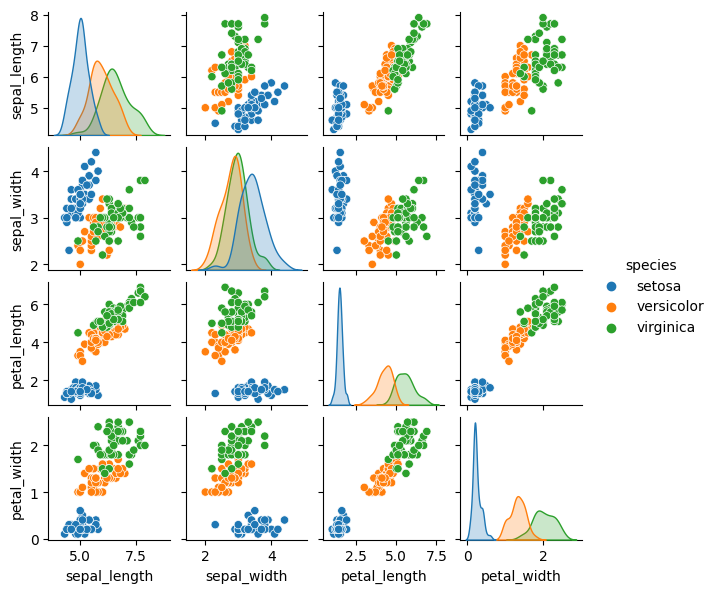

In [ ]:
# Seaborn : p.343
sns.pairplot(iris, hue='species', height=1.5);

In [ ]:
# Drop species
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [ ]:
y_iris = iris['species']
y_iris.shape

(150,)

Scikit-Learn API
- Consistency: All objects share a common interface drawn from a limited set of methods, with consistent documentation.

- Inspection: All specified parameter values are exposed as public attributes.

- Limited object hierarchy: Only algorithms are represented by Python classes; datasets are represented in standard formats (NumPy arrays, Pandas DataFrame objects, SciPy sparse matrices) and parameter names use standard Python strings.

- Composition: Many ML tasks can be expressed as sequences of more fundamental algorithms, and Scikit-Learn makes use of this wherever possible.

- Sensible defaults: When models require user-specified parameters, the library defines an appropriate default value.

Basic Regression

Ex. Simple Linear regression

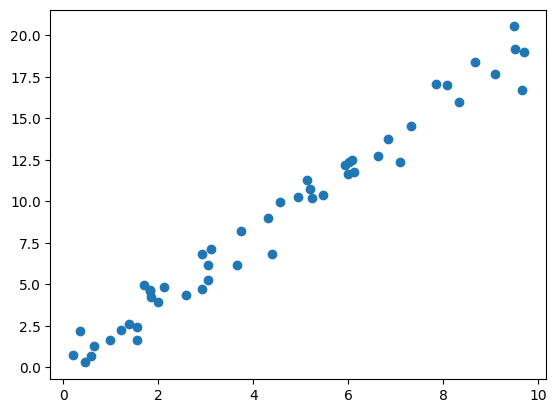

In [ ]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2*x + rng.randn(50)
plt.scatter(x, y);

1. Select model's class

In [ ]:
from sklearn.linear_model import LinearRegression

2. Select model's hyperparameter

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# fit_intercerpt : 절편 값 계산 여부
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

3. Arrange data into a features matrix and target vector

In [ ]:
# x is row vector, which is difficult to represent
X = x[:, np.newaxis]
X.shape

(50, 1)

4. Fit the model to data

In [ ]:
# fit() do many inner-calculation, and stored in model's specific attribut(속성)
model.fit(X, y)

LinearRegression()

5. Predict modes for unknown data
- During fit(), Optimized parameter is applied to model. So '_' means parameter
- Because ML focuses on prediction, Parameter's uncertainty is not important. It is important in Statistics

In [ ]:
# y = ax + b
model.coef_, model.intercept_  # =(a, b)

(array([1.9776566]), 0.09668927446888631)

In [ ]:
xfit = np.linspace(-1, 11)
xfit = xfit[:, np.newaxis]
yfit = model.predict(xfit)

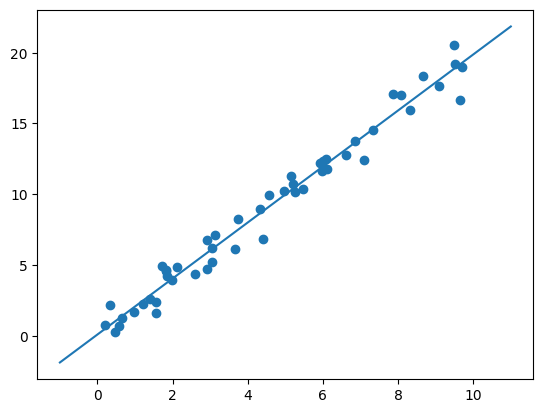

In [ ]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

Ex2. Linear Regression

In [ ]:
def make_linear(a=0.5, b=0.8, size=50, noise=1.0) :
  x = np.random.rand(size)
  y = a*x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
  yy = y + noise

Ex. Iris(붓꽃) Classification (p.385)

Step 1. Noise가 낀 data들을 관측

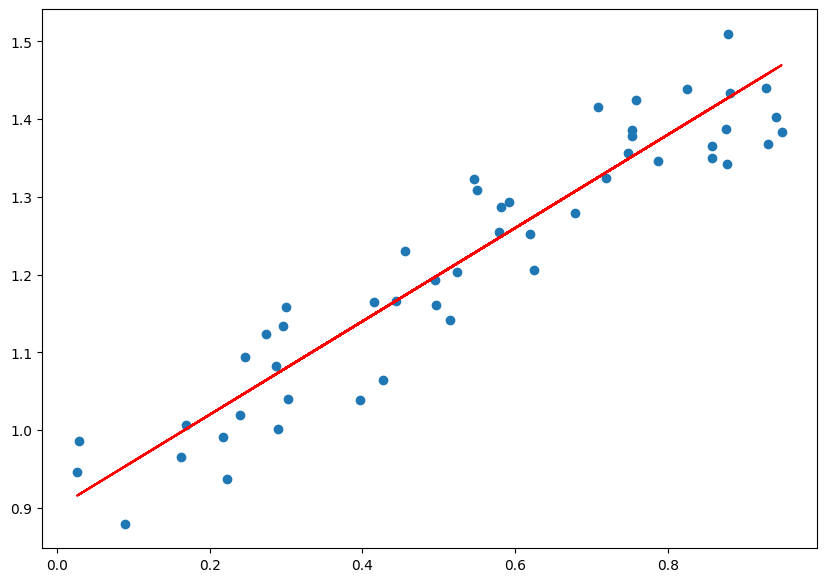

In [9]:
a, b = 0.6, 0.9
x = np.random.rand(50) # 0~1에서 20개 난수
y = a*x + b
noise = np.random.uniform(-0.1, 0.1, 50) # '-1~1' 에서 2개 점의 균등 분포 생성
yy = y + noise # noise 처리된 y value
plt.figure(figsize=(10, 7))
plt.plot(x, y, color='r')
plt.scatter(x, yy, label='data')
plt.show()

# Gaussian Naive Baye
- Bayes classification's goal : When you have observed-features, find future-label's probability
- GNB : suppose each features are independent
- Each feature has mean, variance(분산)

# GaussianMixture's parameters (https://zephyrus1111.tistory.com/420)
- n_components : numbers of cluster
- covariance_type : 'Full(own covariance)', 'Tied(share)', 'Diag(own diagonal covariance', Spherical(own single covariance)'
- means_init : mean's initial value

Supervisied Learning method

In [ ]:
from sklearn.model_selection import train_test_split
# Trainiing-data must be divieded from test_data
# If it is used in both method. 답을 알고 채점하는 꼴!!
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

In [ ]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [ ]:
# Evaluae model
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

Unsupervised Learning method

# Application) Exploring Handwritten Digits

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

# (nums of data, row size, column size)
digits.images.shape

(1797, 8, 8)

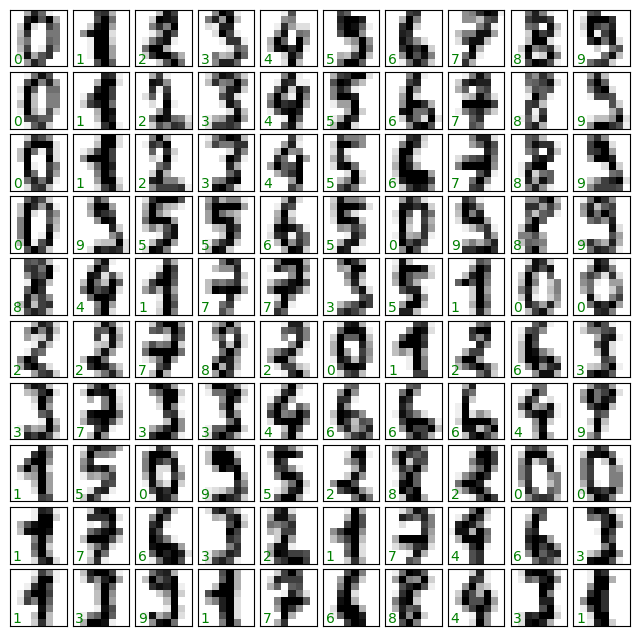

In [ ]:
# Check partial data by using subplot
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

For using data in Scikit-Learn, data-table structure is needed

In [ ]:
# (data, target) = (learning, goal)
X, Y = digits.data, digits.target

X.shape, Y.shape

((1797, 64), (1797,))

Digit data is placed in 64D, and analyzing it is too hard

# Manifold Learning (https://deepinsight.tistory.com/124)
- High-dimension makes its volumne bigger exponentially(기하급수적으로)
- Suppose there will be high-density(data) subspace
- Then, dimension could be lower without loosing key features
- This subspace(low demension) is Manifold
- Manifold should not lose key features. So modifying data's location is needed (very little)


In [ ]:
iso = Isomap(n_components=2) # nums of cluster
iso.fit(digits.data)
data_projected = iso.transform(digits.data)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:352: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


<ipython-input-52-9b4b757980c1>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('viridis', 10))


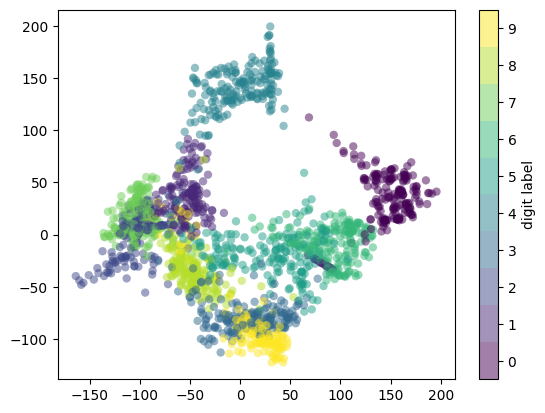

In [ ]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('viridis', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

- Most of data is above on Manifold, so density is high
- Overlapped numbers mean they are hard to identify

In [ ]:
# 2. Select model's hyperpameter
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB() # 1. Select model
model.fit(Xtrain, ytrain) # 4. Fit the model to data
y_model = model.predict(Xtest) # 5. Predict model

In [ ]:
# y_true, y_model
accuracy_score(ytest, y_model)

0.8333333333333334

Accuracy is 83%, but we can't know what data is wrong. Sparse-Matrix will help us find

<Axes: >

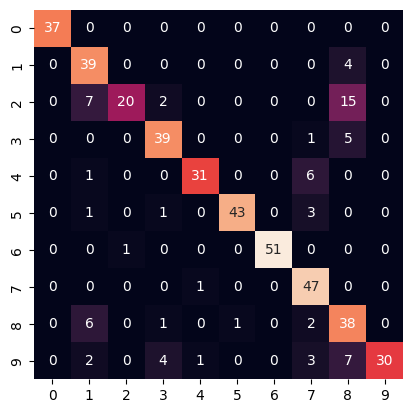

In [ ]:
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)

- diagonal elements are not important
- Ex. 2 is misjudged for 1, 8

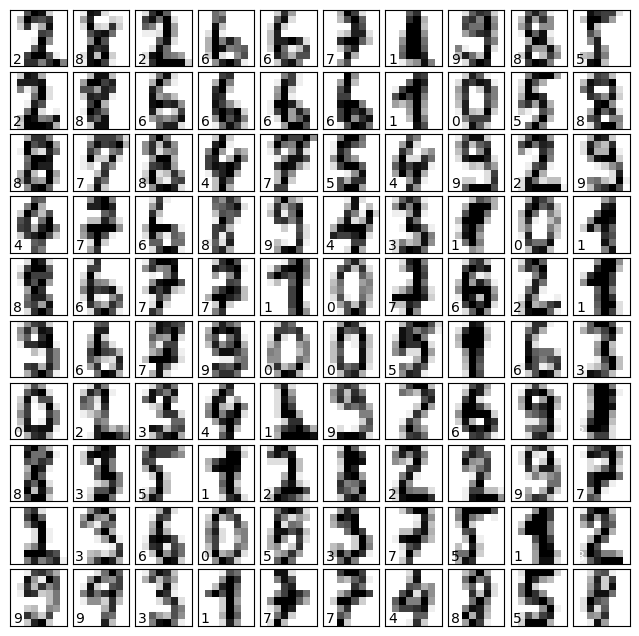

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

# Show only correct data's number
for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='black' if (ytest[i] == y_model[i]) else 'white')

For more high accuracy, another classification approach is needed
- Ex. Support Vector Machine, Random Forests

# Hyperparameter and Model Vertification
- R) Supervised Learning process : select model's class and hyperparameter -> fit model to train data -> predict new data's label

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data # data for learning
y = iris.target # goal data

In [ ]:
# Select model's class
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Fit model to train data
model.fit(X, y)
# Predict new data's label
y_model = model.predict(X)

In [ ]:
# 답을 알고 문제를 푸는 상황..! 표본의 검증이 필요하다
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

Holdout Sets : Vertify the right way

In [ ]:
from sklearn.model_selection import train_test_split
# train_size(0.5) is propotion of learn_data -> divided into 2 samples
# Vertify each others
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)

model.fit(X1, y1)
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

In this way, many vertification can be done

In [ ]:
# Vertify 5 times
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

**Leave-one-out**
- pros) remove extreme(like. mean-5*var) data. Every data is vertified. Verify takes data's nums
- cons) Takes time

In [ ]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores # 0 is removed data

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
scores.mean()

0.96

**Select the best Model**